In [2]:
%matplotlib inline


In [1]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
d:\miniconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(-0.5, 17.5, 21.5, -0.5)

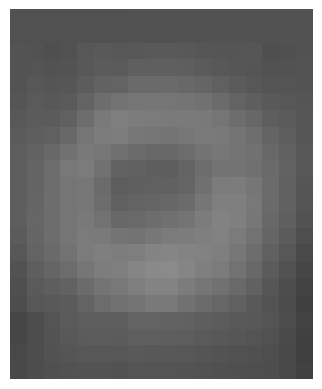

In [4]:
# t, x, y, w = (251, 80, 538, 40)
training_image = dt.LoadImage('D:/OneDrive/Desktop/PhysicsResearch/ParticleTracking/training_data/images/particles/original/01hz left13.png')()._value / 256
crop = training_image
plt.imshow(crop)
plt.axis("off")


In [5]:
crop.shape

(22, 18, 3)

In [6]:

model = dt.models.LodeSTAR(input_shape=(None, None, 3))

train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 162 / 160 samples before starting training
Epoch 1/30
162/162 [==============================] - 17s 37ms/step - total_loss: 2.1497 - consistency_loss: 0.6421
Epoch 2/30
162/162 [==============================] - 9s 58ms/step - total_loss: 1.7740 - consistency_loss: 0.4099             
Epoch 3/30
162/162 [==============================] - 12s 71ms/step - total_loss: 1.4239 - consistency_loss: 0.2445                         
Epoch 4/30
162/162 [==============================] - 15s 94ms/step - total_loss: 0.5715 - consistency_loss: 0.0562                                       
Epoch 5/30
162/162 [==============================] - 15s 90ms/step - total_loss: 0.2623 - consistency_loss: 0.0296                                       
Epoch 6/30
162/162 [==============================] - 14s 88ms/step - total_loss: 0.1407 - consistency_loss: 0.0197                                      
Epoch 7/30
162/162 [==============================] - 13s 83ms/step - total_loss: 0.1293 - consis

1/1 [==============================] - 0s 217ms/step


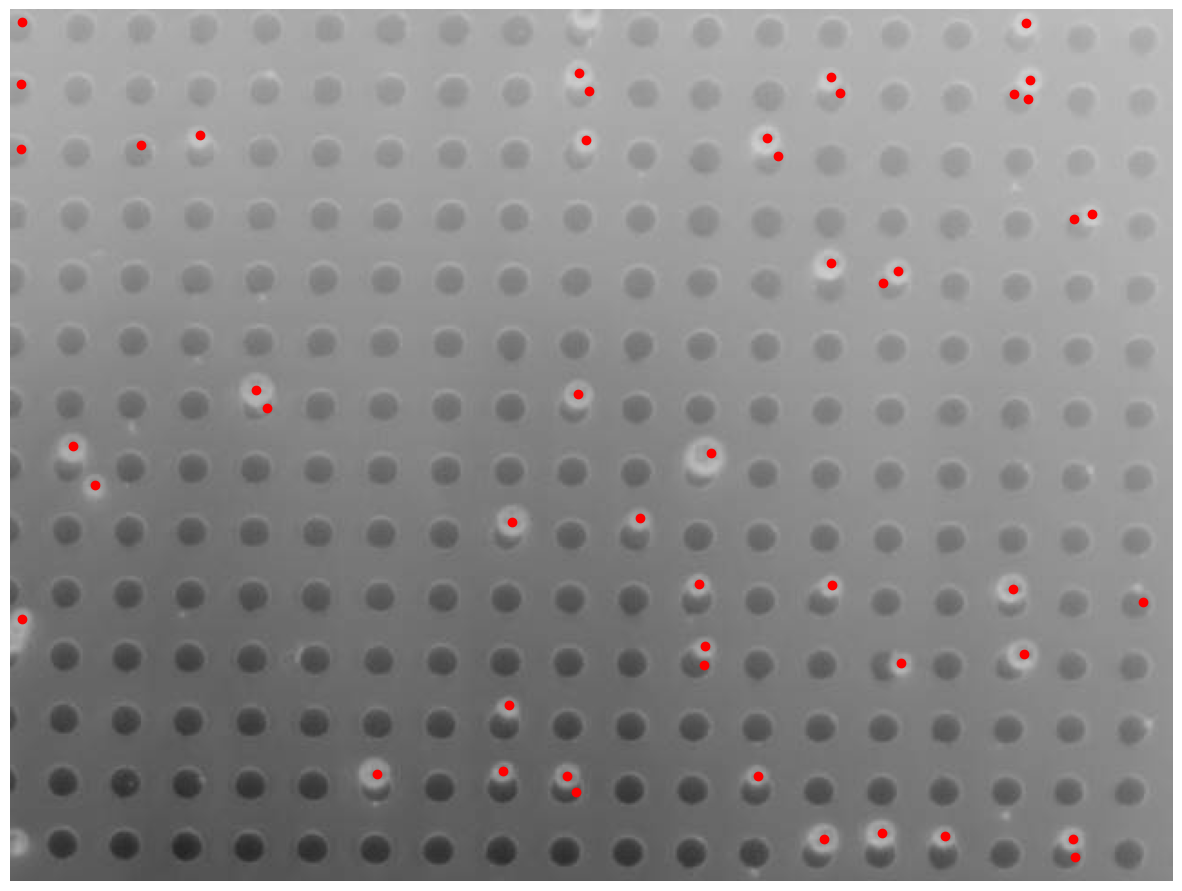

In [30]:
#May need to tune these to get optimal performance!
alpha = 0.5
cutoff = 0.998

# frame_index = 1763

image = dt.LoadImage('D:/OneDrive/Desktop/PhysicsResearch/ParticleTracking/train_data/images/raw/010Hz-021000.png')()._value / 256
# image = image[130:-130, :400]

detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")

In [ ]:
model.save_weights("./models/")

In [2]:
model1 = dt.models.LodeSTAR(input_shape=(None, None, 3))

In [3]:
model1.load_weights("./model/")